## Preprocessing

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

import tensorflow as tf

In [6]:
labels = np.load("labels.npy")

In [7]:
labels[2]

array(['img/0_1-20-2.jpg', 'Red-White Team'], dtype='<U21')

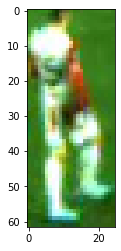

In [8]:
img = mpimg.imread(labels[0][0])
plt.imshow(img)
plt.show()

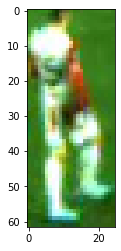

In [9]:
img = img / 255.0
plt.imshow(img)
plt.show()

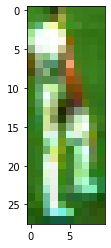

In [10]:
resized_image = cv2.resize(img, (10, 28))
plt.imshow(resized_image)
plt.show()

In [43]:
y = []
x = []

In [44]:
for file_name, label in labels:
  img = mpimg.imread(file_name)
  img = img / 255.0
  resized_image = cv2.resize(img, (10, 28))
  x.append(resized_image)
  if label == "Blue-Black Team":
    y.append([1, 0, 0])
  elif label == "Referee":
    y.append([0, 1, 0])
  elif label == "Red-White Team":
    y.append([0, 0, 1])

In [45]:
X = np.array(x)
y = np.array(y)

In [46]:
X.shape, y.shape

((1217, 28, 10, 3), (1217, 3))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [48]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,10,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 8, 64)         1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 4, 64)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 2, 128)        73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               82048     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [50]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
35/35 [==============================] - 30s 16ms/step - loss: 0.4902 - accuracy: 0.7963 - val_loss: 0.0818 - val_accuracy: 0.9918
Epoch 2/25
35/35 [==============================] - 0s 7ms/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 3/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0789 - accuracy: 0.9836 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 4/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0824 - accuracy: 0.9772 - val_loss: 0.0703 - val_accuracy: 0.9754
Epoch 5/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0606 - accuracy: 0.9845 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 6/25
35/35 [==============================] - 0s 8ms/step - loss: 0.0509 - accuracy: 0.9881 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/25
35/35 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9863 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 8/25
35/35 [

In [53]:
model.save("spc1.h5")